In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [116]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
837,ham,"Sir, I have been late in paying rent for the p...",NaN,NaN,NaN
1902,ham,My sister got placed in birla soft da:-),NaN,NaN,NaN
5492,spam,Marvel Mobile Play the official Ultimate Spide...,NaN,NaN,NaN
4942,ham,Check mail.i have mailed varma and kept copy t...,NaN,NaN,NaN
3882,ham,Gumby's has a special where a &lt;#&gt; \ che...,NaN,NaN,NaN


In [117]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements

##1. Data Cleaning

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [119]:
#Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [120]:
df.sample(5)

,v1,v2
2779,ham,Well I might not come then...
2821,spam,ROMCAPspam Everyone around should be respondin...
4096,ham,i am going to bed now prin
5041,spam,Jamster! To get your free wallpaper text HEART...
1876,ham,Watching tv now. I got new job :)


In [121]:
#Renaming the columns
#As ther column names are not very descriptive

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [122]:
df.sample(5)

,target,text
1489,ham,Ok i juz receive..
4104,ham,Jus finish my lunch on my way home lor... I to...
200,ham,I sent you &lt;#&gt; bucks
606,spam,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
506,ham,"Maybe westshore or hyde park village, the plac..."


In [123]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

A LabelEncoder is a class provided by libraries like scikit-learn that converts categorical labels (text) into numerical values

The fit_transform method combines two steps: fitting the encoder to the data and transforming the data in one go.
Fit: This step identifies all unique categories in the data and assigns each a numerical value.
Transform: This step converts the original categorical data into its corresponding numerical values.

In [124]:
df['target']=encoder.fit_transform(df['target'])

In [125]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [126]:
#Missing values
df.isnull().sum()

,0
target,0
text,0


In [127]:
#check for duplicates
df.duplicated().sum()

403

In [128]:
#remove duplicates
df=df.drop_duplicates(keep='first')

# keep='first': This option retains the first occurrence of each duplicate row and removes all subsequent duplicates

In [129]:
df.duplicated().sum()

0

In [130]:
df.shape

(5169, 2)

## 2. EDA

In [131]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [132]:
df['target'].value_counts()

,count
target,
0,4516
1,653


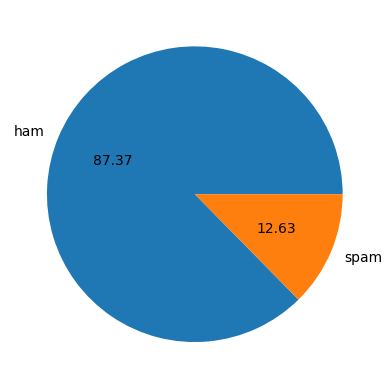

In [133]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [134]:
#Data is imbalanced

In [135]:
import nltk

In [136]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [137]:
df['text']

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [138]:
df['text'].apply(len)  #Number of characters used

,text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [139]:
df['num_characters']=df['text'].apply(len)

In [140]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [141]:
#getting all the words
df['text'].apply(lambda x:nltk.word_tokenize(x))

,text
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


 The apply method is used to apply a function to each element in a pandas Series (in this case, the 'text' column).

 lambda x: nltk.word_tokenize(x): This is a lambda function, which is an anonymous (unnamed) function defined in a concise way

 lambda x: This defines a function that takes one argument, x. In this context, x represents each individual entry (or row) in the 'text' column.

 nltk.word_tokenize(x): This calls the word_tokenize function from the Natural Language Toolkit (NLTK) library, which splits the text into individual words (tokens). So for each entry x, it will tokenize the text.

In [142]:
#Number of words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

,text
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [143]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [144]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [145]:
#Number of sentences
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

,text
0,2
1,2
2,2
3,1
4,1
...,...
5567,4
5568,1
5569,2
5570,1


In [146]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [147]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [148]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [149]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() #For ham messages

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [150]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe() #For spam messages

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

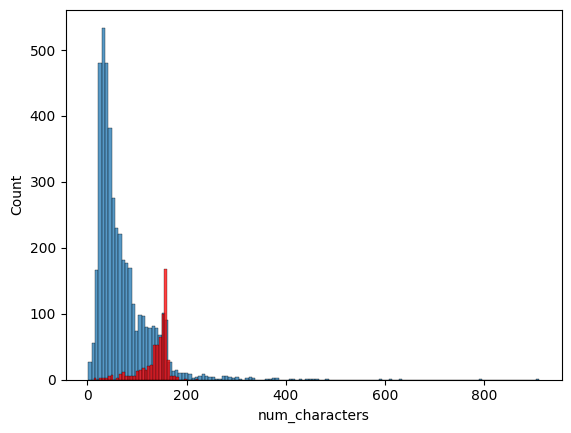

In [151]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

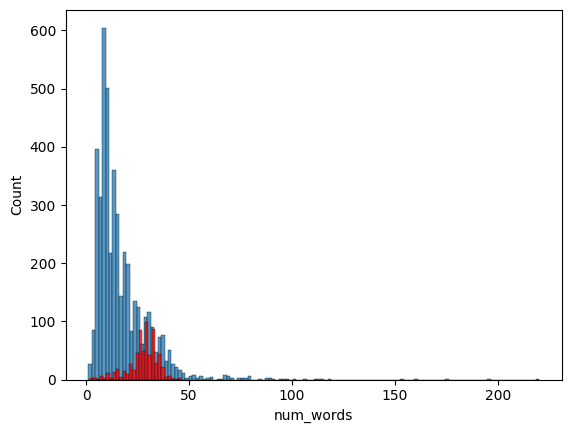

In [152]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

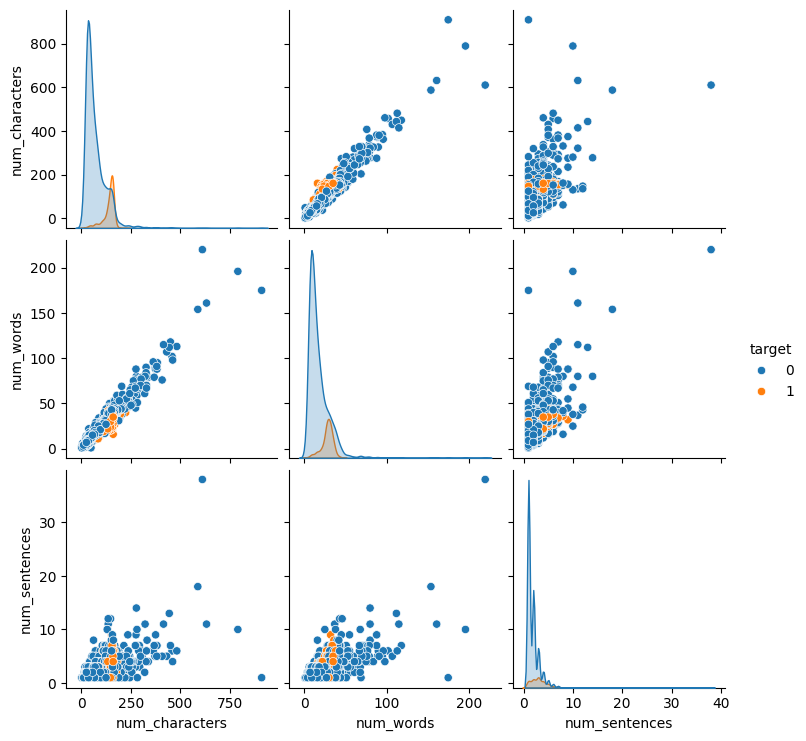

In [153]:
sns.pairplot(df,hue='target')

In [154]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

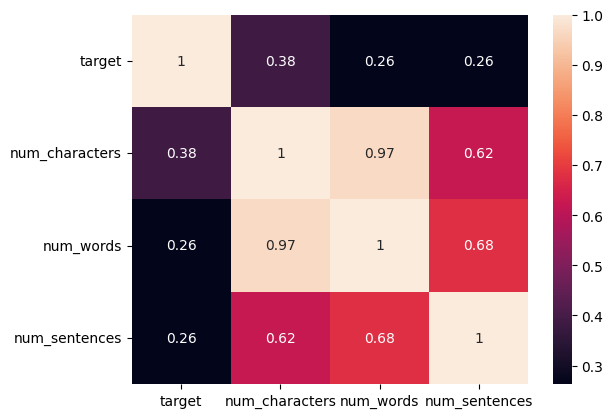

In [155]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

##Data Preprocessing


*   Lower Case
*   Tokenization:Tokenization is the process of breaking down text into smaller units called tokens. These tokens can be words, phrases, or sentences.This is a crucial step in NLP because it transforms a continuous stream of text into manageable pieces. For example, the sentence "Natural Language Processing is fun!" would be tokenized into the following tokens: ["Natural", "Language", "Processing", "is", "fun", "!"].
*   Removing special Characters
*   Removing Stop Words and punctuation:Stop words are common words that usually do not add significant meaning to a sentence (e.g., "is", "and", "the")
*   Stemming:Stemming is the process of reducing words to their base or root form. For example, "running", "runner", and "ran" would all be reduced to "run".



In [156]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
from nltk.corpus import stopwords
import string

In [158]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [159]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:  #Looping through the list
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return" ".join(y)   #combines elements of a list (or any iterable) into a single string

In [160]:
transform_text("Hello guys its% dancing me!!!???%")

'hello guy danc'

In [161]:
df['text'].apply(transform_text)

,text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [162]:
df['transformed_text']=df['text'].apply(transform_text)

In [163]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Word Cloud
* A word cloud (or tag cloud) is a visual representation of text data, where the size of each word indicates its frequency or importance within a given text

* Word clouds provide a quick visual summary of the most prominent words in a body of text. The larger the word appears, the more frequently it occurs, allowing you to grasp key themes at a glance.



In [164]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [165]:
spam_sw=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

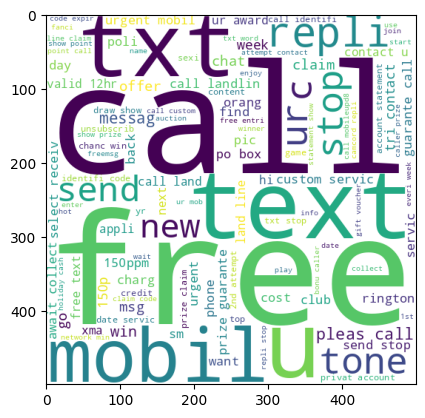

In [166]:
plt.imshow(spam_sw)

In [167]:
ham_sw=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

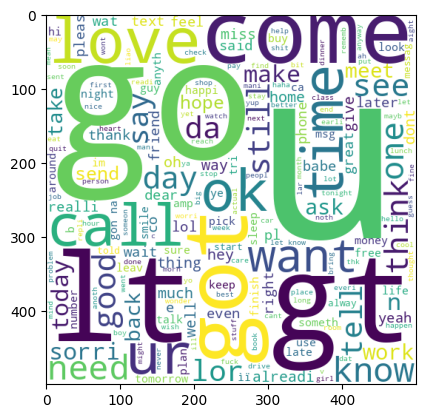

In [168]:
plt.imshow(ham_sw)

In [169]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [170]:
##Now we will try to get the most commonly occurring words in spam msgs

In [171]:
df[df['target']==1]['transformed_text']

,transformed_text
2,free entri 2 wkli comp win fa cup final tkt 21...
5,freemsg hey darl 3 week word back like fun sti...
8,winner valu network custom select receivea pri...
9,mobil 11 month u r entitl updat latest colour ...
11,six chanc win cash 100 pound txt csh11 send co...
...,...
5537,want explicit sex 30 sec ring 02073162414 cost...
5540,ask 3mobil 0870 chatlin inclu free min india c...
5547,contract mobil 11 mnth latest motorola nokia e...
5566,remind o2 get pound free call credit detail gr...


In [172]:
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [173]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [174]:
from collections import Counter

In [175]:
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [176]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [177]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


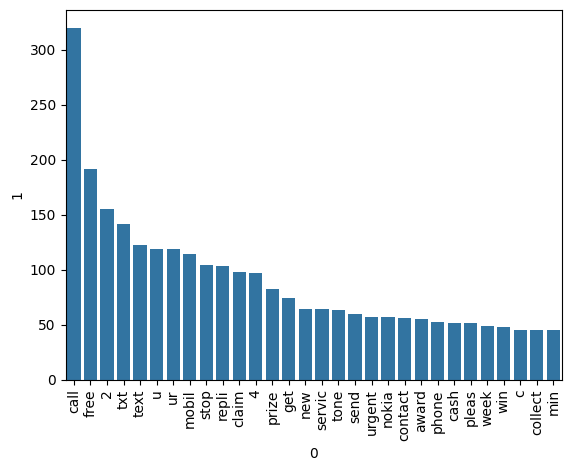

In [178]:
sns.barplot(x=0,y=1,data=pd.DataFrame(Counter(spam_corpus).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()


In [179]:
ham_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

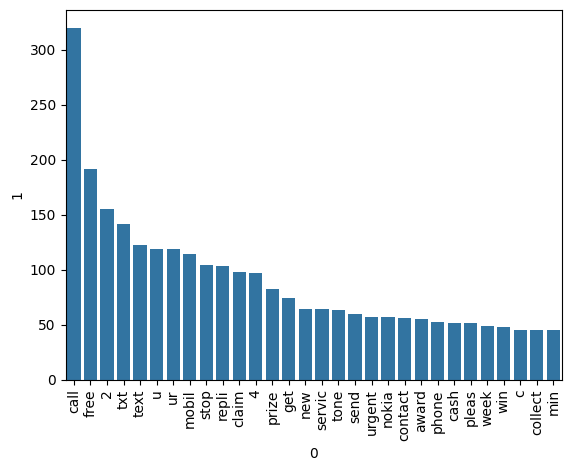

In [180]:
sns.barplot(x=0,y=1,data=pd.DataFrame(Counter(ham_corpus).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

### Text Vectorization

Text vectorization is a crucial step in Natural Language Processing (NLP) that transforms text data into a numerical format, enabling machine learning algorithms to process and analyze it effectively.

#### 1. Bag of Words (BoW)

The Bag of Words (BoW) approach represents text as a collection of words, disregarding grammar and word order. Each unique word becomes a feature, and the vector reflects the frequency of each word in the document.

For example, consider the sentences "I love NLP" and "NLP is fun." The BoW representation would look like this:

| I  | love | NLP | is | fun |
|----|------|-----|----|-----|
| 1  |  1   |  1  | 0  | 0   | (for "I love NLP") |
| 0  |  0   |  1  | 1  | 1   | (for "NLP is fun") |

#### 2. Term Frequency-Inverse Document Frequency (TF-IDF)

TF-IDF is a method used to evaluate how important a word is to a document in a collection (or corpus) of documents. It combines two key ideas:

- **Term Frequency (TF)**: This measures how often a word appears in a specific document. The more frequently a word appears, the more important it is within that document.

- **Inverse Document Frequency (IDF)**: This measures how common or rare a word is across all documents. Words that appear in many documents are considered less informative (like "the," "is," etc.), while words that appear in fewer documents are more informative.

#### 3. Word Embeddings

Word embeddings are a way to represent words as vectors (arrays of numbers) in a continuous, high-dimensional space. The goal is to capture the meanings and relationships between words based on how they are used in context.

Imagine a 3D space where each point represents a word. Words with similar meanings or that are used in similar contexts are located closer together in this space. For example, "cat" and "dog" would be close to each other, while "cat" would be far from "car."

Word embeddings are trained on large datasets, learning how words interact in different contexts. For instance, the word "bank" might be close to "money" in one context and to "river" in another. This contextual learning allows the embeddings to capture nuances of meaning.



In [181]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [182]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

A sparse array is an array in which most of the elements are zero. It efficiently stores only the non-zero elements, along with their indices, which saves memory.

A dense array is an array where most of the elements are non-zero. It stores all values, including zeros, in a contiguous block of memory.

In [183]:
X=cv.fit_transform(df['transformed_text']).toarray() #Gives a sparse array

In [184]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [185]:
X.shape

(5169, 6708)

In [186]:
y=df['target'].values

In [187]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [190]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [191]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [192]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [193]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [194]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [195]:
###Now instead of Count Vectorizer(Bag of words) lets try TF IDF

In [196]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [197]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [198]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [199]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [200]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [201]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In case of imbalanced data(like in our case),precision is better than the other metrics

- **High Precision Means Reliability**: It tells you how many of the predicted positives are actually correct. In critical applications (like fraud detection or disease diagnosis), you want to be sure that when the model says "yes," it's right most of the time.

- **Avoiding False Positives**: If your model predicts a lot of positives incorrectly (false positives), it can lead to unnecessary actions or costs. High precision ensures that predictions are trustworthy, minimizing this risk.

Imagine you’re developing a model to detect fraudulent transactions, where only 2% of transactions are fraudulent (positive class) and 98% are legitimate (negative class).

- **Model Predictions**:
  - True Positives (TP): 30 (correctly identified as fraudulent)
  - False Positives (FP): 10 (legitimate transactions incorrectly marked as fraudulent)
  - True Negatives (TN): 950 (correctly identified as legitimate)
  - False Negatives (FN): 10 (fraudulent transactions missed)

### Metrics:

Precision =TP/(TP+FP)=30/(30+10)=75%
Recall=TP/(TP+FN)=30/(30+10)=75%
Accuracy=TP+TN/Total=(30+950)/1000=98%

Although the accuracy is high (98%), the model’s precision (75%) shows that when it predicts fraud, it’s correct 75% of the time. This is crucial for a fraud detection system—if it frequently misclassifies legitimate transactions as fraudulent (false positives), it can lead to significant customer dissatisfaction and unnecessary investigations. Hence, high precision is essential in this scenario.

In [202]:
##So we will choose mnb with tf idf

In [203]:
##Lets try other models also other than naive bayes

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [205]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbct=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [206]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBCT':gbct,
    'xgb':xgb
}


In [207]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [208]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For",name)
  print("Accuracy-",current_accuracy)
  print("Precision-",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy- 0.9729206963249516
Precision- 0.9741379310344828
For KN
Accuracy- 0.9003868471953579
Precision- 1.0
For NB
Accuracy- 0.9593810444874274
Precision- 1.0
For DT
Accuracy- 0.937137330754352
Precision- 0.8543689320388349
For LR
Accuracy- 0.9516441005802708
Precision- 0.94
For RF
Accuracy- 0.971953578336557
Precision- 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy- 0.9613152804642167
Precision- 0.9454545454545454
For BgC
Accuracy- 0.9584139264990329
Precision- 0.8625954198473282
For ETC
Accuracy- 0.9729206963249516
Precision- 0.9824561403508771
For GBCT
Accuracy- 0.9526112185686654
Precision- 0.9238095238095239
For xgb
Accuracy- 0.9729206963249516
Precision- 0.9435483870967742


In [209]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [210]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBCT,0.952611,0.923810
7,BgC,0.958414,0.862595


##Trying to improve model
TF IDF class has a paramter called max_features

By setting a limit (using max_features), you tell your model to focus only on the most important words

In [211]:
tfidf=TfidfVectorizer(max_features=3000)

In [212]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [214]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For",name)
  print("Accuracy-",current_accuracy)
  print("Precision-",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy- 0.9758220502901354
Precision- 0.9747899159663865
For KN
Accuracy- 0.9052224371373307
Precision- 1.0
For NB
Accuracy- 0.9709864603481625
Precision- 1.0
For DT
Accuracy- 0.9294003868471954
Precision- 0.8282828282828283
For LR
Accuracy- 0.9564796905222437
Precision- 0.9696969696969697
For RF
Accuracy- 0.97678916827853
Precision- 0.975


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy- 0.9690522243713733
Precision- 0.9732142857142857
For BgC
Accuracy- 0.9593810444874274
Precision- 0.8692307692307693
For ETC
Accuracy- 0.9777562862669246
Precision- 0.967479674796748
For GBCT
Accuracy- 0.9506769825918762
Precision- 0.9306930693069307
For xgb
Accuracy- 0.9680851063829787
Precision- 0.9338842975206612


In [215]:
new_performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [216]:
new_performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.976789,0.975000
0,SVC,0.975822,0.974790
6,AdaBoost,0.969052,0.973214
4,LR,0.956480,0.969697
8,ETC,0.977756,0.967480
10,xgb,0.968085,0.933884
9,GBCT,0.950677,0.930693
7,BgC,0.959381,0.869231


In [217]:
#lets try to make a voting classifier from our best performing classifiers

In [218]:
from sklearn.ensemble import VotingClassifier

In [219]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [220]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [221]:
print(accuracy_score(y_test,voting.predict(X_test)))
print(precision_score(y_test,voting.predict(X_test)))

0.9796905222437138
0.9834710743801653
